In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# Import the dataset from keras
We can import the dataset conveniently from keras with the "load_data()" function.

In [43]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Print some of the labels
We print out the first 8 pictures of our train dataset with the respective labels. To represent the labels in a readable way (per default the labels are numbers), we created an array with the coresponding words.

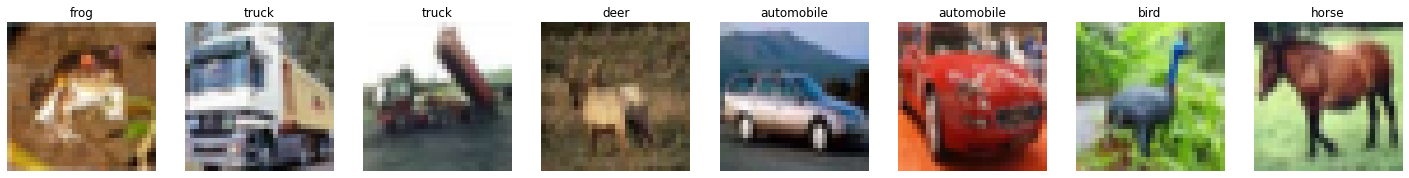

In [44]:
labels = np.array(["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])

fig, ax = plt.subplots(1,8, figsize=(25, 25))

for i in range(8):

  img = train_images[i]
  # transform the number we get into the written label
  label = labels[train_labels[i][0]]

  ax[i].imshow(img)
  ax[i].set_title(label)
  ax[i].axis('off')

# Input pipeline

In [45]:
### for train dataset
# create tf.Dataset for training dataset
train_dataset_images = tf.data.Dataset.from_tensor_slices(train_images)
# cast the images to float to allow for image normalization (they are uint8 before and we need the
# values to be in the continous range)
train_dataset_images = train_dataset_images.map(lambda x: tf.cast(x, dtype=tf.float32))
# normalize the images
train_dataset_images = train_dataset_images.map(lambda x: tf.image.per_image_standardization(x))
# create tf.Dataset for training labels
train_dataset_labels = tf.data.Dataset.from_tensor_slices(train_labels)
# one-hot encode the labels
train_dataset_labels = train_dataset_labels.map(lambda x: tf.reshape(tf.one_hot(x, 10), (-1,)))

# zip labels and images together again
train_dataset = tf.data.Dataset.zip((train_dataset_images, train_dataset_labels))
# batching
train_dataset = train_dataset.batch(128)
# prefetch
train_dataset = train_dataset.prefetch(32)
# shuffle the images
train_dataset = train_dataset.shuffle(buffer_size=128)

### now the test dataset
# create tf.Dataset for test dataset
test_dataset_images = tf.data.Dataset.from_tensor_slices(test_images)
# cast to float
test_dataset_images = test_dataset_images.map(lambda x: tf.cast(x, dtype=tf.float32))
# normalize the images
test_dataset_images = test_dataset_images.map(lambda x: tf.image.per_image_standardization(x))
# create tf.Dataset for training labels
test_dataset_labels = tf.data.Dataset.from_tensor_slices(test_labels)
# one-hot encode the labels
test_dataset_labels = test_dataset_labels.map(lambda x: tf.reshape(tf.one_hot(x, 10), (-1,)))

# zip labels and images together again
test_dataset = tf.data.Dataset.zip((test_dataset_images, test_dataset_labels))
# batching
test_dataset = test_dataset.batch(128)
# prefetch
test_dataset = test_dataset.prefetch(32)
# shuffle the images
test_dataset = test_dataset.shuffle(buffer_size=128)

In [46]:
# we want to check which size the images have 
# because we need the shape for the first convolutional layer
# we get the shape = (128, 32, 32, 3)
# 128 is the batch size
# the size is 32x32
# and 3 channels for red, green, blue
for image,_ in train_dataset:
  print(image.shape)
  break

(128, 32, 32, 3)


In [47]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer

class Model(Model):

  def __init__(self):
    super(Model, self).__init__()
    # Define the layers
    # batch normalizations
    # centralize the drives of the layers around 0
    self.batch_norm1 = tf.keras.layers.BatchNormalization()
    self.batch_norm2 = tf.keras.layers.BatchNormalization()
    self.batch_norm3 = tf.keras.layers.BatchNormalization()
    self.batch_norm4 = tf.keras.layers.BatchNormalization()
    self.batch_norm5 = tf.keras.layers.BatchNormalization()
    self.batch_norm6 = tf.keras.layers.BatchNormalization()
    self.batch_norm7 = tf.keras.layers.BatchNormalization()

    # activation functions
    # we used elu's to prevent dying relu's
    # we need the activations as seperate layers because 
    # batch normalizations normalizes the drives and is afterwards 
    # fed into the activation function
    self.elu1 = tf.keras.activations.elu
    self.elu2 = tf.keras.activations.elu
    self.elu3 = tf.keras.activations.elu
    self.elu4 = tf.keras.activations.elu
    self.elu5 = tf.keras.activations.elu
    self.elu6 = tf.keras.activations.elu

    # pooling layers 
    self.max_pool1 = tf.keras.layers.MaxPool2D()
    self.max_pool2 = tf.keras.layers.MaxPool2D()
    self.max_pool3 = tf.keras.layers.MaxPool2D() 

    # 6 convolutional layers
    # we used zero padding to prevent the resulting feature maps from becoming too small
    self.conv1 = tf.keras.layers.Conv2D(filters=16, kernel_size=3, 
                                        input_shape=(32,32,3),
                                        padding='same', 
                                        # weight initialization = Normal Distribution 
                                        kernel_initializer=tf.keras.initializers.glorot_normal(),
                                        activation=None)

    self.conv2 = tf.keras.layers.Conv2D(filters=32, kernel_size=3,
                                        padding='same', 
                                        kernel_initializer=tf.keras.initializers.glorot_normal(),
                                        activation=None)

    self.conv3 = tf.keras.layers.Conv2D(filters=64, kernel_size=3,
                                        padding='same', 
                                        kernel_initializer=tf.keras.initializers.glorot_normal(),
                                        activation=None)

    self.conv4 = tf.keras.layers.Conv2D(filters=64, kernel_size=3,
                                    padding='same',
                                    kernel_initializer=tf.keras.initializers.glorot_normal(),
                                    activation=None)
    
    self.conv5 = tf.keras.layers.Conv2D(filters=128, kernel_size=3,
                                    padding='same', 
                                    kernel_initializer=tf.keras.initializers.glorot_normal(),
                                    activation=None)
    
    self.conv6 = tf.keras.layers.Conv2D(filters=128, kernel_size=3,
                                    padding='same',
                                    kernel_initializer=tf.keras.initializers.glorot_normal(),
                                    activation=None)

    # use dropout
    self.dropout1 = tf.keras.layers.Dropout(rate=0.3)
    self.dropout2 = tf.keras.layers.Dropout(rate=0.3)
    self.dropout3 = tf.keras.layers.Dropout(rate=0.4)

    # flattening
    self.flatten = tf.keras.layers.Flatten()

    # output layers
    self.output_layer = tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax, 
                                               kernel_initializer=tf.keras.initializers.glorot_normal())


  @tf.function
  def call(self, x, training=True):
    x = self.conv1(x)
    x = self.batch_norm1(x, training)
    x = self.elu1(x)
    x = self.conv2(x)
    x = self.batch_norm2(x, training)
    x = self.elu2(x)
    x = self.max_pool1(x)
    x = self.dropout1(x, training)

    x = self.conv3(x)
    x = self.batch_norm3(x, training)
    x = self.elu3(x)
    x = self.conv4(x)
    x = self.batch_norm4(x, training)
    x = self.elu4(x)
    x = self.max_pool2(x)
    x = self.dropout2(x, training)

    x = self.conv5(x)
    x = self.batch_norm5(x, training)
    x = self.elu5(x)
    x = self.conv6(x)
    x = self.batch_norm6(x, training)
    x = self.elu6(x)
    x = self.max_pool3(x)
    x = self.dropout3(x, training)

    x = self.flatten(x)
    x = self.output_layer(x)

    return x


In [48]:
def train_step(model, input, target, loss_function, optimizer, training=True):
    # loss_object and optimizer_object are instances of respective tensorflow classes
    with tf.GradientTape() as tape:
        prediction = model(input, training)
        loss = loss_function(target, prediction)
        gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss 

def test(model, test_data, loss_function, training=False):
    # test over complete test data
    test_accuracy_aggregator = []
    test_loss_aggregator = []

    for (input, target) in test_data:
        prediction = model(input, training)
        sample_test_loss = loss_function(target, prediction) 

        sample_test_accuracy = np.argmax(target, axis=1) == np.argmax(prediction, axis=1)
        sample_test_accuracy = np.mean(sample_test_accuracy)
        
        test_loss_aggregator.append(sample_test_loss.numpy())
        test_accuracy_aggregator.append(sample_test_accuracy)

    test_loss = np.mean(test_loss_aggregator)
    test_accuracy = np.mean(test_accuracy_aggregator)

    return test_loss, test_accuracy

# Training plot

To actually see the performance of our Neural Network while training and not wait until it's finished with learning we created a plot which is updated every epoch. With that we are able see quite early if the model we just created performs rather good or bad. 


In [49]:
# Visualize accuracy and loss for training and test data. 
# One plot training and test loss.
# One plot training and test accuracy.
from IPython import display 

def plot(train_losses, test_losses, test_accuracies, figsize=(10,3)):
  display.clear_output(wait=True)

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
  axes[0].plot(train_losses, label="training")
  axes[0].plot(test_losses, label="test")
  axes[0].set_xlabel("Epochs")
  axes[0].set_ylabel("Loss")
  axes[0].set_ylim([0.1,3])
  axes[0].set_title("Loss", fontsize=20)
  axes[0].legend()
  axes[1].plot(test_accuracies)
  axes[1].set_xlabel("Epochs")
  axes[1].set_ylabel("Accuracy")
  axes[1].set_title("Accuracy: " + str(round(np.max(test_accuracies), 3)), fontsize=20)
  plt.show()

# Training

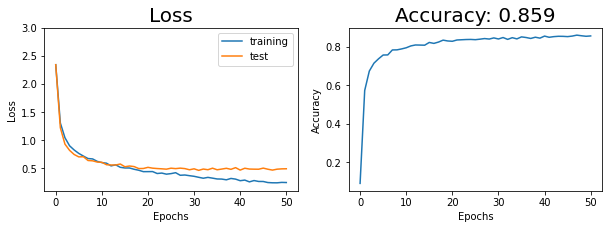

In [50]:
tf.keras.backend.clear_session()

### Hyperparameters
num_epochs = 50
learning_rate = 0.001
running_average_factor = 0.95

# Initialize the model.
model = Model()
# Initialize the loss: categorical cross entropy. Check out 'tf.keras.losses'.
cross_entropy_loss = tf.keras.losses.CategoricalCrossentropy()
# Initialize the optimizer: Adam with default parameters. Check out 'tf.keras.optimizers'
optimizer = tf.keras.optimizers.Adam(learning_rate)

# Initialize lists for later visualization.
train_losses = []

test_losses = []
test_accuracies = []

#testing once before we begin
test_loss, test_accuracy = test(model, test_dataset, cross_entropy_loss)
test_losses.append(test_loss)
test_accuracies.append(test_accuracy)

#check how model performs on train data once before we begin
train_loss, _ = test(model, train_dataset, cross_entropy_loss)
train_losses.append(train_loss)

# We train for num_epochs epochs.
for epoch in range(num_epochs):
    print('Epoch: __ ' + str(epoch))

    #training (and checking in with training)
    running_average = 0
    for (input,target) in train_dataset:
        train_loss = train_step(model, input, target, cross_entropy_loss, optimizer)
        running_average = running_average_factor * running_average  + (1 - running_average_factor) * train_loss
    train_losses.append(running_average)

    #testing
    test_loss, test_accuracy = test(model, test_dataset, cross_entropy_loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    plot(train_losses, test_losses, test_accuracies)

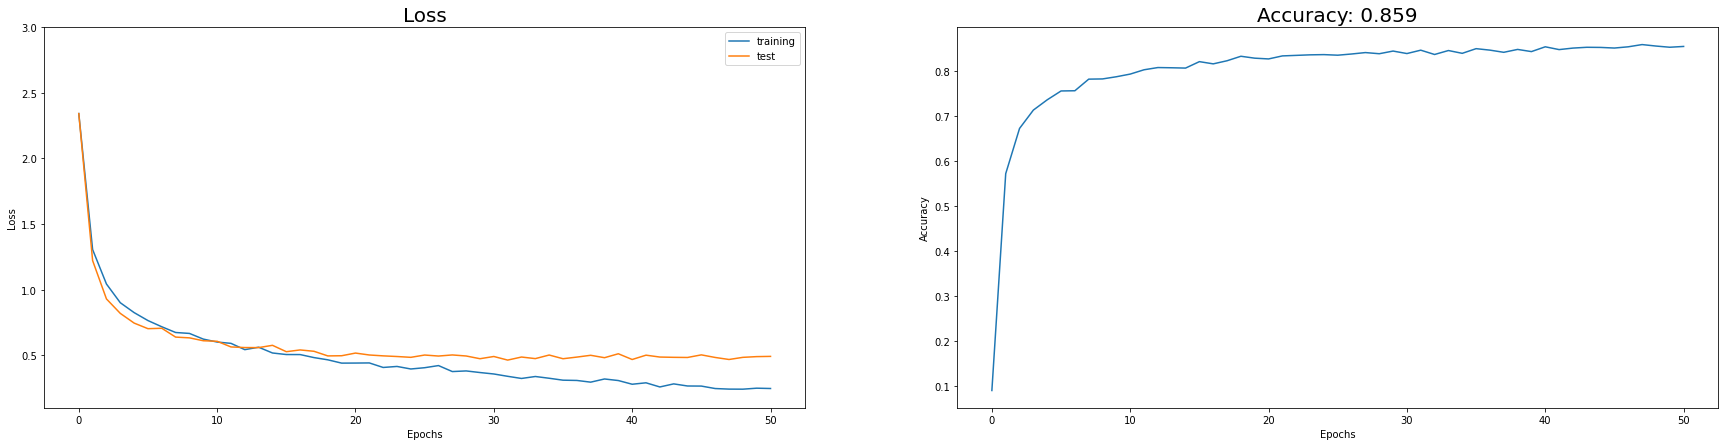

In [51]:
# Visualize final accuracy and loss for training and test data.
plot(train_losses, test_losses, test_accuracies, figsize=(30,7))